# Word Count with Map-Reduce - Lab

## Introduction

Now that we have seen the key map and reduce operators in spark, and also know when to use transformation and action operators, we can revisit the word count problem we introduced earlier in the section. In this lab, we will use the methods seen in the coding labs to read a text corpus into the spark environment, perform a word count, and try basic NLP ideas to get a good grip on how Map-Reduce performs. 

## Objectives

You will be able to:

* Describe the Map-Reduce operation in a big data context
* Perform basic NLP tasks with a given text corpus
* Perform basic analysis using the experimental findings towards identifying writing styles

## Map-Reduce task

Here is what our problem looks like:

* We have a huge text document
* We need to count the number of times each distinct word appears in the document


* Sample applications:

    * Analyze web server logs to find popular URLs
    * Analyze texts for content or style 

## Word Count

We will illustrate a Map-Reduce computation for counting the number of occurrences for each word in a text corpus. In this example, the input file is a repository of documents and each document is an element. We shall count the frequency of stop words for __style identification__ as stop words might have unique features which can potentially describe the author's writing style based on their use of stop words while writing. We shall look at some texts by Shakespeare and Jane Austin following this motivation. 

Map-Reduce in PySpark provides a practical and efficient way of achieving this goal as it: 

* works if the file is too large for memory

* works even if the output is too large for memory

* is naturally parallelizable


### Map-Reduce Framework

Here are the steps that we will perform for our problem, under the Map-Reduce framework. 

* Sequentially read a lot of data (text files in this case)


* Map:
    * Extract something you care about


* Group by key: Sort and Shuffle


* Reduce:
    * Aggregate, summarize, filter or transform


* Write the result 

As a reminder, here is what it looks like visually, given the example we used before:
![](./images/word_count.png)

### Initialize SparkContext()

First, import the pyspark module into this python environment and initialize a `SparkContext()`

- Initialize a local spark context

In [1]:
import pyspark

In [2]:
# Start a local SparkContext
sc = pyspark.SparkContext("local[*]")
# Code here 


To test our code, we shall start with a single text file, hamlet.txt. First, we will set a file path variable.

set a file path variable `file` to the location of `text/hamlet.txt`

In [3]:
# Set a path variable for data 
file = "text/hamlet.txt"
# Code here 
file

'text/hamlet.txt'

## Read and Split text file contents into RDD - `sc.textFile()`

Previously we used parallelization to read an RDD from a python list. Here we shall read the text file into Spark RDDs by using `sc.textFile()` method for loading the text file into the `lines` RDD. The documentation on RDDs can be found [here!!](https://spark.apache.org/docs/latest/rdd-programming-guide.html)

The `textFile(path)` method reads a text file from the HDFS/local file system/any Hadoop supported file system, into the number of partitions specified and returns it as an RDD of strings. In order to view the contents of the RDD, we will use the `RDD.collect()` method since calling the RDD by name will not return the contents, only the object type and relevant information 

In [4]:
# Read the text file into an RDD using sc.textFile()
lines = sc.textFile(file,10)

# Code here 


The text file has been written in a "line-by-line" manner into the RDD. We can access any given entry using simple indexing. 

- Print a few sample lines from the `lines` RDD

In [5]:
# Code here 
lines.take(5)

['', '1604', '', '', 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK']

Similarly, we can also print the whole document, lines by line. 

- Print complete Hamlet from the lines RDD

In [6]:
# Print the text, line-by-line
# This will output the whole of hamlet text, one line at a time. 

lines.collect()
# Code here 


['',
 '1604',
 '',
 '',
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK',
 '',
 '',
 'by William Shakespeare',
 '',
 '',
 '',
 'Dramatis Personae',
 '',
 '  Claudius, King of Denmark.',
 '  Marcellus, Officer.',
 '  Hamlet, son to the former, and nephew to the present king.',
 '  Polonius, Lord Chamberlain.',
 '  Horatio, friend to Hamlet.',
 '  Laertes, son to Polonius.',
 '  Voltemand, courtier.',
 '  Cornelius, courtier.',
 '  Rosencrantz, courtier.',
 '  Guildenstern, courtier.',
 '  Osric, courtier.',
 '  A Gentleman, courtier.',
 '  A Priest.',
 '  Marcellus, officer.',
 '  Bernardo, officer.',
 '  Francisco, a soldier',
 '  Reynaldo, servant to Polonius.',
 '  Players.',
 '  Two Clowns, gravediggers.',
 '  Fortinbras, Prince of Norway.  ',
 '  A Norwegian Captain.',
 '  English Ambassadors.',
 '',
 '  Getrude, Queen of Denmark, mother to Hamlet.',
 '  Ophelia, daughter to Polonius.',
 '',
 "  Ghost of Hamlet's Father.",
 '',
 '  Lords, ladies, Officers, Soldiers, Sailors, Messengers,

Great, now that the complete text file is in a `lines` RDD, we can easily use the map function to break it down further into individual words and parallelize it accordingly. 

__Note: Parallelization is handled by the Spark environment according to available infrastructure and doesn't need any further configuration__.

## The MAP function `map(func)`

The Map function for this example uses keys that are of type string (the words) and values that are integers. The Map task reads a document and breaks it into its sequence of words `w1, w2, . . . , wn`. It then makes a sequence of key-value pairs for each word where the word itself is the key and the value is always 1. That is, the output of the Map task for this document is the sequence of key-value pairs as shown below:

> `(w1, 1), (w2, 1), . . . ,(wn, 1)`

This step performs the following two sub-steps:

* A splitting step that takes the input data set from the source and divides it into smaller sub-sets.
* A mapping step that takes those smaller sub-sets and performs an action or computation on each sub-set.


### Spark Mapping functions

Previously, we saw that:

- `map(func)` returns a new distributed data set formed by passing each element of the source through a function `func`.

- `flatMap(func)` maps each input item to 0 or more output items (so `func` should return a seq rather than a single item).

`flatMap()` breaks the output of a lambda function into individual RDD elements (as opposed to map).

---

* Use `RDD.flatMap` to split the lines by whitespace and collect into one flat RDD.

* The transformation is defined in the lambda expression, where the input x is defined as producing the result of `x.split(' ')`.

* Use the `RDD.take(n)` method to pick n words from the top of the sequence. n=10

`flatMap()` breaks the output of the lambda function into individual RDD elements (as opposed to map).


In [7]:
# split the lines into words based on blanks ' ' and show ten elements from the top 
words = lines.flatMap(lambda x: x.split(" "))
# Code here
words.take(10)


# ['', '1604', '', '', 'THE', 'TRAGEDY', 'OF', 'HAMLET,', 'PRINCE', 'OF']

['', '1604', '', '', 'THE', 'TRAGEDY', 'OF', 'HAMLET,', 'PRINCE', 'OF']


### Create a Tuple as (k,v)

- Map each word to a tuple of (word, 1).

Map doesn't break up the output of the lambda expression, meaning that the tuples stay intact.

In [8]:
# Use a lambda function with map to add a 1 to each word and output a tuple
# (word, 1) - Take ten elements
tuples = words.map(lambda x: (x.lower(),1))
tuples.take(10)
# Code here 

[('', 1),
 ('1604', 1),
 ('', 1),
 ('', 1),
 ('the', 1),
 ('tragedy', 1),
 ('of', 1),
 ('hamlet,', 1),
 ('prince', 1),
 ('of', 1)]

### Change the words to lower case to ensure integrity

As we can see from the output above, the text contains words in capital as well as lower case. By default, 'THE' and 'the' would be considered two separate words due to case sensitivity. 

- Modify the map function above to change all the words to lowercase using a `.lower()` inside the lambda function.


In [ ]:
# Change the words in words tuples to lowercase - take 10 elements 


# Code here 

## REDUCE Function
The Reduce function’s argument is a pair consisting of a key and its list of associated values as the pairs created above. The output of the Reduce function is a sequence of zero or more key-value pairs. These key-value pairs can be of a type different from those sent from Map tasks to Reduce tasks, but often they are the same type.

We shall refer to the application of the Reduce function to a single key and its associated list of values as a reducer.

![](reduce.png)

- Use `RDD.reduceByKey` to add up all the words. the new k,v pairs would have the word as a key and the number of occurrences as a value. 

Here, the lambda has two arguments (x and y) that are added.

In [9]:
# Use reduceByKey with tuplesLCase to add all values under same keys - take 10

# Code here 
reduced = tuples.reduceByKey(lambda x,y: x+y)
reduced.take(15)

[('', 20383),
 ('of', 670),
 ('king', 43),
 ('nephew', 3),
 ('polonius,', 6),
 ('guildenstern,', 5),
 ('soldier', 2),
 ('two', 23),
 ('norway.', 1),
 ('sailors,', 2),
 ('before', 17),
 ('castle.', 15),
 ('[who', 2),
 ('at', 87),
 ('ber.', 19)]

### Filter rare words

Following the standard NLP approach, we can add a filtering step to remove all words which appear less than some thershaold value, say, with less than 5 occurrences. 

This can be useful to identify common topics between documents, where very rare words can be misleading. 
For this step, we shall use the `RDD.filter(func)` where func is a lambda function that filters out any word which appears less than or equal to 5 times. You may also use a separate function to achieve this. 

- Remove rare words with occurences < 5 using lambda function inside a `.filter()` method. 

In [10]:
# Remove all rare words with frequency less than 5 - take 10 
filtered = reduced.filter(lambda x: x[1]>5)
filtered.take(10)
# Code here 


[('', 20383),
 ('of', 670),
 ('king', 43),
 ('polonius,', 6),
 ('two', 23),
 ('before', 17),
 ('castle.', 15),
 ('at', 87),
 ('ber.', 19),
 ('have', 176)]

### List  of stop words

Add a filtering step to retain only words included in a list of stop words. 

Stop words can be useful for recognizing the style of an author. Removing stop words can be useful in recognizing the topic of a document. For stop word removal, we use the `RDD.filter(func)` again with a lambda function that uses a list of stop words to extract the key-value pairs for only the words that are present in the stop word list. Use a simple list like the one shown below:
> ['', 'the','a','in','of','on','at','for','by','I','you','me'] 


- Use the stop word list above to count the occurrences of these words in the document
- Show the stop word frequency

In [11]:
# show stop word frequency in the output


# Code here 
stopwords = ['', 'the','a','in','of','on','at','for','by','i','you','me']
filtered.filter(lambda x: x[0] in stopwords).take(10)

[('', 20383),
 ('of', 670),
 ('at', 87),
 ('by', 111),
 ('you', 433),
 ('in', 420),
 ('i', 523),
 ('me', 144),
 ('on', 108),
 ('the', 1083)]

### List of keep words

- Modify the filter operation above to keep all the words found in the text **except** the stop words. 

In [12]:
# Modify above filter to show top ten keep words by frequency


# Code here 
filtered.filter(lambda x: x[0] not in stopwords).take(10)

[('king', 43),
 ('polonius,', 6),
 ('two', 23),
 ('before', 17),
 ('castle.', 15),
 ('ber.', 19),
 ('have', 176),
 ('think', 39),
 ('is', 327),
 ('us', 46)]

### Putting it all together 

Combine the above code as a function and pass three works of Shakespeare (romeandjuliet.txt, hamlet.txt, othello.txt). Observe the frequency of stop words. Repeat the same exercise for three works of Jane Austin (senseandsensibility.txt, prideandprejudice.txt and emma.txt). 

> Can you recognize the writing styles of these authors based on their use of stop words?
> What can you do to improve the style recognition ability?

In [16]:
# Create a function for word count that takes in a file name and stop wordlist to perform above tasks
def wordCount(filename, stopWordlist):
    rdd = sc.textFile(filename)
    words = rdd.flatMap(lambda x: x.split(" "))
    tokens = words.map(lambda x: (x,1))
    filtered = tokens.filter(lambda x: x[0] in stopWordlist)
    output = filtered.reduceByKey(lambda x,y: x+y)
    return sorted(output.collect(), key = lambda x:x[0])

['senseandsensibility 2.txt',
 'othello.txt',
 'emma.txt',
 'romeoandjuliet.txt',
 'prideandprejudice.txt',
 'hamlet.txt']

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
file_list = os.listdir("text")

In [40]:
testarray = np.asarray(wordCount("text/hamlet.txt",stopwords))
testarray

array([['', '20383'],
       ['a', '453'],
       ['at', '75'],
       ['by', '92'],
       ['for', '162'],
       ['in', '382'],
       ['me', '144'],
       ['of', '625'],
       ['on', '99'],
       ['the', '929'],
       ['you', '361']], dtype='<U5')

<BarContainer object of 10 artists>

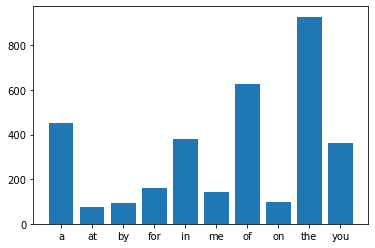

In [50]:
plt.bar(testarray[1:,0],testarray[1:,1].astype(int))

In [29]:
wordCount("text/othello.txt",stopwords)

[('', 4229),
 ('a', 426),
 ('at', 67),
 ('by', 99),
 ('for', 180),
 ('in', 300),
 ('me', 187),
 ('of', 499),
 ('on', 97),
 ('the', 697),
 ('you', 391)]

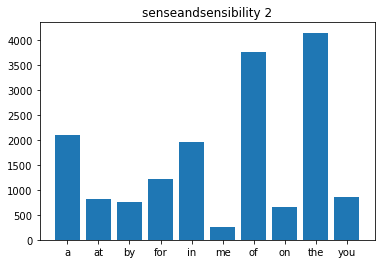

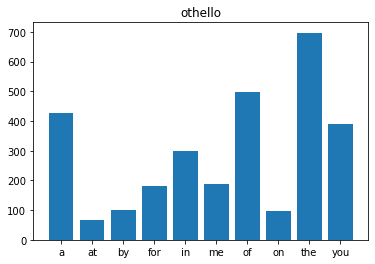

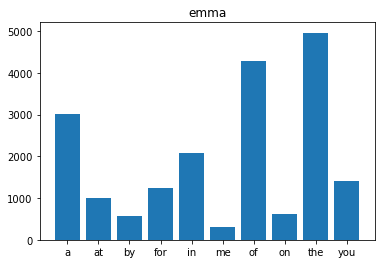

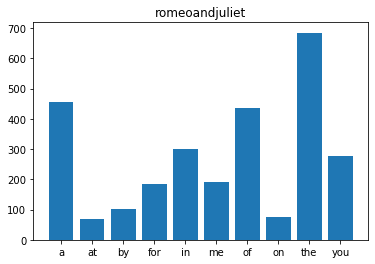

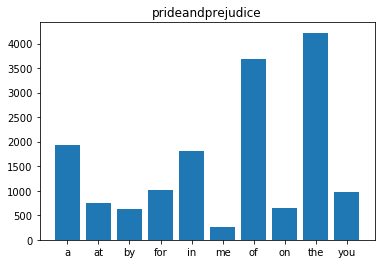

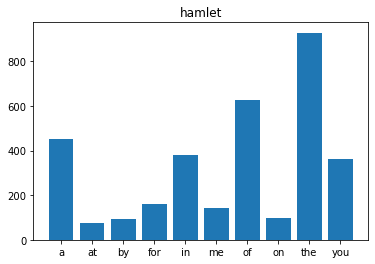

In [52]:
for file in file_list:
    data = np.asarray(wordCount("text/"+file, stopwords))
    plt.bar(x = data[1:,0], height = data[1:,1].astype(int))
    plt.title(file[:-4])
    plt.show()

## Level Up

* Create histograms of the top 50 words from each author


## Summary 

In this simple exercise, we saw Map-Reduce in action for solving a basic NLP task i.e. counting the frequency of stop words and keep words of a text corpus. This exercise can be seen as a first step towards text analytics on big data platforms. After this lab, we will get into more advanced use cases of pyspark, specifically for machine learning applications.
